# Homework 4: Simulation, Sampling, and Bootstrapping

## Due Thursday, February 22nd at 11:59PM

Welcome to Homework 4! This homework will cover:
- Simulations (see [CIT 9.3-9.4](https://inferentialthinking.com/chapters/09/3/Simulation.html))
- Sampling and Empirical Distributions (see [CIT 10-10.4](https://inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html))
- Bootstrapping and Confidence Intervals (see [CIT 13.2](https://inferentialthinking.com/chapters/13/2/Bootstrap.html) and [CIT 13.3](https://inferentialthinking.com/chapters/13/3/Confidence_Intervals.html))

### Instructions

Remember to start early and submit often. You are given six slip days throughout the quarter to extend deadlines. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

**Important**: For homeworks, the `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). These are great questions for office hours (the schedule can be found [here](https://dsc10.com/calendar)) or Ed. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

In [1]:
# Please don't change this cell, but do make sure to run it.
import babypandas as bpd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import otter
grader = otter.Notebook()

## 1. Triton Spirit Night Lotto, continued 🔱 🏀 

In the last homework, we calculated the probability of winning the grand prize (free housing) on a Spirit Night Lotto lottery ticket, and found that it was quite low 😭.

In [2]:
# Just run this cell, do not change it!
free_housing_chance = (1 / 66) * (1 / 65) * (1 / 64) * (1 / 63) * (1 / 62) * (1 / 15)
free_housing_chance

6.216404065866433e-11

In this question, we'll approach the same question not using math, but using simulation. 

It's important to remember how this lottery works:
- First, you pick five **different** numbers, one at a time, from 1 to 66, representing the winning score at the Spirit Night game.
- Then, you separately pick a number from 1 to 15. This is because the top scoring athlete (Bryce Pope) scored 15 points during the game. Let's say you select 9.
- The six numbers you have selected, or  **your numbers**, can be represented all together as (7, 32, 24, 65, 13, 9). This is a _sequence_ of six numbers – **order matters**!

The **winning numbers** are chosen by King Triton, who draws five balls, one at a time, **without replacement**, from a pot of white balls numbered 1 to 66. Then, he draws a gold ball, the Tritonball, from a pot of gold balls numbered 1 to 15. Both pots are completely separate, hence the different ball colors. For example, maybe the winning numbers are (65, 9, 24, 23, 1, 9).

We’ll assume for this problem that in order to win the grand prize (free housing), all six of your numbers need to match the winning numbers and be in the **exact same positions**. In other words, your entire sequence of numbers must be exactly the same as King Triton's sequence of winning numbers. However, if some numbers in your sequence match up with the corresponding number in the winning sequence, you will still win some Triton Cash. 

Suppose again that you select (7, 32, 24, 65, 13, 9) and the winning numbers are (65, 9, 24, 23, 1, 9). In this case, two of your numbers are considered to match two of the winning numbers. 
- Your numbers: (7, 32, **24**, 65, 13, **9**)
- Winning numbers: (65, 9, **24**, 23, 1, **9**)

You won't win free housing, but you will win some Triton Cash. Note that although both sequences include the number 65 within the first five numbers (representing a white ball), since they are in different positions, that's not considered a match.


**Question 1.1.** Implement a function called `simulate_one_ticket`. It should take no arguments, and it should return an array with 6 random numbers, simulating how the numbers are selected for a single Spirit Night Lotto ticket. The first five numbers should all be randomly chosen without replacement, from 1 to 66. The last number should be between 1 and 15.

In [3]:
def simulate_one_ticket():
    """Simulate one Spirit Night Lotto ticket."""
    first_five = np.arange(1, 67)
    last_num = np.arange(1, 16)
    numbers = np.random.choice(first_five, 5, replace = False)
    numbers = np.append(numbers, np.random.choice(last_num, 1))
    
    return numbers

simulate_one_ticket()

array([ 5,  1, 42, 11, 26,  7])

In [4]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** It's draw day. You checked the winning numbers King Triton drew, which happened to be **(26, 49, 64, 5, 12, 7)**. Below, calculate how many matches there are between the winning numbers and a randomly generated ticket, and save the result in `num_matches`. Remember, order matters when counting matches!

***Hint:*** You don't need a `for`-loop for this question. There is a one-line solution using `np.count_nonzero`.

In [5]:
winning = np.array([26, 49, 64, 5, 12, 7])
simulated_ticket = simulate_one_ticket()
num_matches = np.count_nonzero(simulated_ticket == winning)

print(f"The number of matches between the winning numbers {winning} and the simulated ticket {simulated_ticket} is {num_matches}.")

The number of matches between the winning numbers [26 49 64  5 12  7] and the simulated ticket [41 63 32 61 31 13] is 0.


In [6]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Question 1.3.** You are disappointed because you bought a lottery ticket but you did not win free housing. To make yourself feel better, you write a simulation to remind yourself how unlikely it is to win the grand prize. 

Implement a simulation where you call the function `simulate_one_ticket` 100,000 times. In your 100,000 tickets, **how many times did you win the grand prize (free housing)?** Assign your answer to `count_free_housing`. (It would cost a fortune if you were to buy 100,000 tickets – it's pretty nice to be able to simulate this experiment instead of doing it in real life!) 

***Hint:*** Start by writing a simulation where you only buy 10 tickets. Once you are sure you have that figured out, then ramp it up to 100,000 tickets. This is a good general practice for writing simulations: start small! It may take a little while (up to a minute) for Python to perform the calculations when you are buying 100,000 tickets. 

In [7]:
winning = np.array([26, 49, 64, 5, 12, 7])
repetitions = 100000
count_free_housing = 0

for i in np.arange(repetitions):
    
    your_ticket = simulate_one_ticket()
    
    if np.count_nonzero(winning == your_ticket) == 6:
        count_free_housing = count_free_housing + 1
    
count_free_housing

0

In [8]:
grader.check("q1_3")

q1_3 results: All test cases passed!

How many times did you win free housing? Remember, the mathematical probability of winning free housing is quite low, on the order of $10^{-11}$. That's a lot lower than 1 in 100,000, which is $10^{-5}$.

**Question 1.4.** As we've seen, you would need to be extremely lucky to win the grand prize. To encourage more students to buy Spirit Night Lotto tickets despite the terrible odds, there are some additional prizes. Students can win Triton Cash if *some* of their numbers match the corresponding winning numbers, as described in the introduction. Again, simulate the act of buying 100,000 tickets, but this time find **the greatest number of matches achieved by any of your tickets**, and assign this number to `most_matches`. 

For example, if 90,000 of your tickets matched 1 winning number and 10,000 of your tickets matched 2 winning numbers, then you would set `most_matches` to 2. If 99,999 of your tickets matched 1 winning number and one of your tickets matched 4 winning numbers, you would set `most_matches` to 4. If you happened to win the grand prize on one of your tickets, you would set `most_matches` to 6. 

***Hint:*** There are several ways to approach this; one way involves storing the number of matches per ticket in an array and finding the largest number in that array. 

In [9]:
winning = np.array([26, 49, 64, 5, 12, 7])
repetitions = 100000
tickets = np.array([])

for rep in np.arange(repetitions):
    
    your_ticket = simulate_one_ticket()
    matches = np.count_nonzero(your_ticket == winning)        
    tickets = np.append(tickets, matches)
    
most_matches = tickets.max()

most_matches

3.0

In [10]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 1.5.** Suppose one Spirit Night Lotto ticket costs $5.

The Spirit Night Lotto advertisement on Instagram promises you will never lose money because of the following generous prizes:

- Win $15 with a 1-number match

- Win $50 with a 2-number match

- Win $100 with a 3-number match

- Win $1,000 with a 4-number match

- Win $5,000 with a 5-number match

- Win $25,000 with a 6-number match (free housing!)

If you had the money to buy 100,000 tickets, what would be your net winnings from buying these tickets? Since this is net winnings, this should account for the prizes you win and the cost of buying the tickets. Assign the amount to `net_winnings`. Note that a positive value means you won money overall, and a negative value means you lost money overall. Do you believe the advertisement's claims?

The winning numbers are the same from the previous part: **(26, 49, 64, 5, 12, 7)**.

***Hint:*** Again, there are a few ways you could approach this problem. One way involves generating another 100,000 random tickets and counting the amount earned per ticket, adding to a running total. Alternatively, if you created an array of the number of matches per ticket in Question 1.4, you could loop through that array. For practice, you can try solving this problem multiple ways!

In [11]:
net_winnings = -500000

for num in tickets:
    
    if num == 0:
        net_winnings = net_winnings + 0
    
    elif num == 1:
        net_winnings = net_winnings + 15
        
    elif num == 2:
        net_winnings = net_winnings + 50
        
    elif num == 3:
        net_winnings = net_winnings + 100
        
    elif num == 4:
        net_winnings = net_winnings + 1000
        
    elif num == 5:
        net_winnings = net_winnings + 5000
        
    elif num == 6:
        net_winnings = net_winnings + 25000

net_winnings

-273305

In [12]:
grader.check("q1_5")

q1_5 results: All test cases passed!

## 2. Sampling with Netflix 🍿🎬

In this question, we will use a [dataset](https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores) consisting of information about **all** Netflix Original movies, including documentaries and specials, that were released before June 1, 2021. We'll use this data to get some practice with sampling. Run the cell below to load the data into a DataFrame, indexed by title.

In [13]:
# Just run this cell, do not change it!
movie_data = bpd.read_csv('data/netflix_originals.csv').set_index('Title')
movie_data

,Genre,Premiere,Runtime,IMDb Score,Language
Title,,,,,
Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
The Open House,Horror thriller,"January 19, 2018",94,3.2,English
Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...
Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English


We've provided a function called `compute_statistics` that takes as input a DataFrame with two columns, `'Runtime'` and `'IMDb Score'`, and then:
- draws a histogram of `'Runtime'`,
- draws a histogram of `'IMDb Score'`, and
- returns a two-element array containing the mean `'Runtime'` and mean `'IMDb Score'`.

Run the cell below to define the `compute_statistics` function, and a helper function called `histograms`. Don't worry about how this code works, and please don't change anything.

In [14]:
# Don't change this cell, just run it.
def histograms(df):
    runtimes = df.get('Runtime').values
    ratings = df.get('IMDb Score').values
    
    plt.subplots(1, 2, figsize=(15, 4), dpi=100)

    plt.subplot(1, 2, 1)
    plt.hist(runtimes, density=True, alpha=0.5, color='blue', ec='w', bins=np.arange(0, 250, 10))
    plt.title('Distribution of Runtimes')

    plt.subplot(1, 2, 2)
    plt.hist(ratings, density=True, alpha=0.5, color='blue', ec='w', bins=np.arange(0, 10, 0.4))
    plt.title('Distribution of IMDb Scores')
    
def compute_statistics(runtimes_and_ratings_data, draw=True):
    if draw:
        histograms(runtimes_and_ratings_data)
    avg_runtime = runtimes_and_ratings_data.get('Runtime').mean()
    avg_rating = runtimes_and_ratings_data.get('IMDb Score').mean()
    avg_array = np.array([avg_runtime, avg_rating]) 
    return avg_array

We can use this `compute_statistics` function to show the distribution of `'Runtime'` and `'IMDb Score'` and compute their means, for any collection of movies. 

Run the next cell to show these distributions and compute the means for all Netflix Original movies. Notice that an array containing the mean `'Runtime'` and mean `'IMDb Score'` values is displayed before the histograms.

array([93.57705479,  6.27174658])

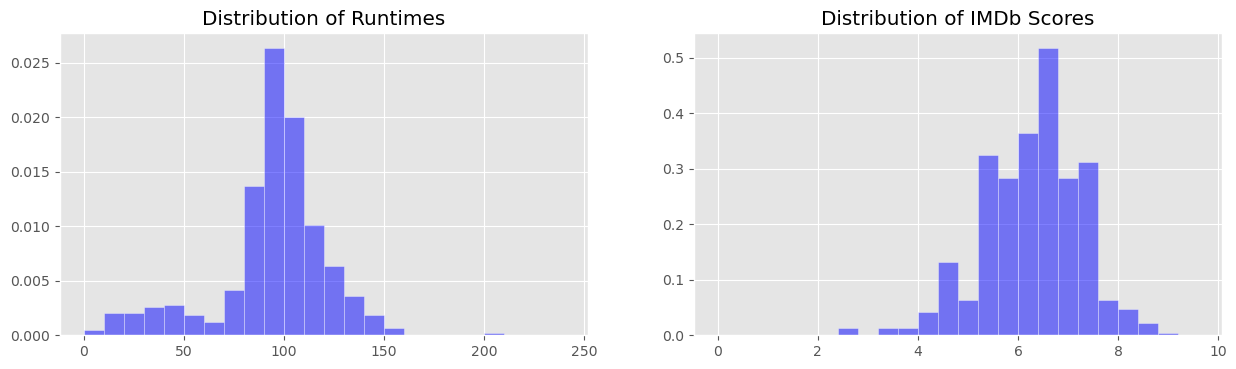

In [15]:
movie_stats = compute_statistics(movie_data)
movie_stats

Now, imagine that instead of having access to the full *population* of movies, we only have access to data on a smaller subset of movies, or a *sample*.  For 584 movies, it's not so unreasonable to expect to see all the data, but usually we aren't so lucky.  Instead, we often make *statistical inferences* about a large underlying population using a smaller sample.

**Statistical inference** is the process of using data in a sample to _infer_ some characteristic about the population from which the sample was drawn. A common strategy for statistical inference is to estimate a parameter of the population by computing a corresponding statistic on a sample. This strategy sometimes works well and sometimes doesn't.  The degree to which it gives us useful answers depends on several factors.

One very important factor in the utility of samples is how they were gathered. Let's look at some different sampling strategies.

### Convenience sampling
One sampling methodology, which is **generally a bad idea**, is to choose movies which are somehow convenient to sample.  For example, you might choose movies that you have personally watched, since it's easier to collect information about them.  This is called *convenience sampling*.

**Question 2.1.**  Suppose your favorite types of movies are rom-coms 🥰 and thrillers 😱, and you decide to manually look up information on all Netflix Original movies in the following genres:
- `'Romantic comedy'`
- `'Thriller'`

Assign `convenience_sample` to a subset of `movie_data` that contains only the rows for movies that are in one of these two genres.

In [16]:
convenience_sample = movie_data[(movie_data.get('Genre') == 'Romantic comedy') | (movie_data.get('Genre') == 'Thriller')]
convenience_sample

,Genre,Premiere,Runtime,IMDb Score,Language
Title,,,,,
Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
Whipped,Romantic comedy,"September 18, 2020",97,4.1,Indonesian
Mercy,Thriller,"November 22, 2016",90,4.2,English
Secret Obsession,Thriller,"July 18, 2019",97,4.4,English
The Girl on the Train,Thriller,"February 26, 2021",120,4.4,Hindi
...,...,...,...,...,...
Calibre,Thriller,"June 29, 2018",101,6.8,English
AK vs AK,Thriller,"December 24, 2020",108,6.9,Hindi
To All the Boys I've Loved Before,Romantic comedy,"August 17, 2018",99,7.1,English


In [17]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2.** Assign `convenience_stats` to an array of the mean `'Runtime'` and mean `'IMDb Score'` of your convenience sample.  Since they're computed on a sample, these are called *sample means*. 

***Hint:*** Use the function `compute_statistics`; it's okay if histograms are displayed as well.

array([102.72222222,   5.71805556])

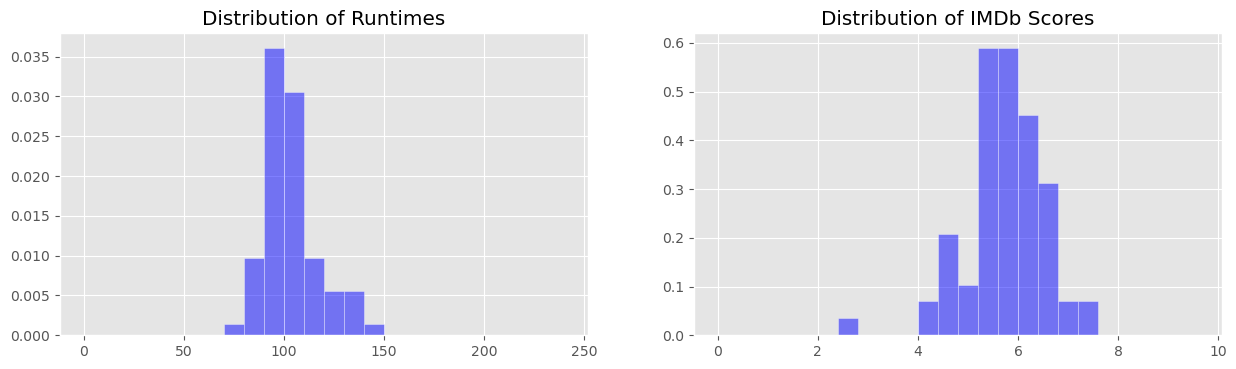

In [18]:
convenience_stats = compute_statistics(convenience_sample)
convenience_stats

In [19]:
grader.check("q2_2")

q2_2 results: All test cases passed!

Next, we'll compare the distribution of `'Runtime'` in our convenience sample to the distribution of `'Runtime'` for all the movies in our dataset.

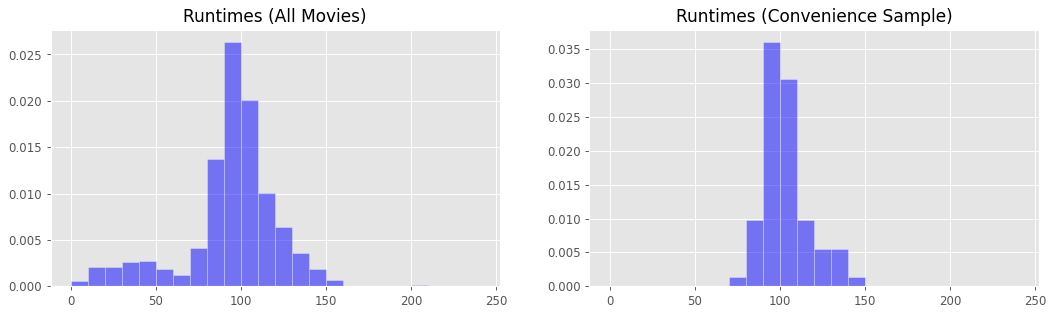

In [20]:
# Just run this cell, do not change it!
def compare_runtimes(first, second, first_title, second_title):
    """Compare the runtimes in two DataFrames."""
    bins = np.arange(0, 250, 10)
    
    plt.subplots(1, 2, figsize=(15, 4), dpi=85)

    plt.subplot(1, 2, 1)
    plt.hist(first.get('Runtime'), bins=bins, density=True, ec='w', color='blue', alpha=0.5)
    plt.title(f'Runtimes ({first_title})')
    
    plt.subplot(1, 2, 2)
    plt.hist(second.get('Runtime'), bins=bins, density=True, ec='w', color='blue', alpha=0.5)
    plt.title(f'Runtimes ({second_title})')

compare_runtimes(movie_data, convenience_sample, 'All Movies', 'Convenience Sample')

**Question 2.3.** From what you see in the histograms above, did the convenience sample give us an accurate picture of the runtimes for the full population of movies?  Why or why not?

Assign either 1, 2, 3, or 4 to the variable `sampling_q3` below. 
1. Yes. The sample is large enough, so it is an accurate representation of the population.
1. No. Convenience samples generally don't give us an accurate representation of the population.
1. No. Normally convenience samples give us an accurate representation of the population, but we just got unlucky.
1. No. Normally convenience samples give us an accurate representation of the population, but only if the sample size is large enough. Our convenience sample here was too small.

In [21]:
sampling_q3 = 2

In [22]:
grader.check("q2_3")

q2_3 results: All test cases passed!

### Simple random sampling
A more principled approach is to sample uniformly at random from the movies.  If we ensure that each movie is selected at most once, this is a **random sample without replacement**, sometimes called a "**simple random sample**" or "**SRS**".  Imagine writing down each movie's title on a card, putting the cards in a hat, and shuffling the hat.  To sample, pull out cards one by one and set them aside, stopping when the specified *sample size* is reached.

We've produced two simple random samples of `ratings_data`: the variable `small_srs_data` contains a SRS of size 70, and the variable `large_srs_data` contains a SRS of size 180.

Now we'll run the same analyses on the small simple random sample, the large simple random sample, and the convenience sample. The subsequent code draws the histograms and computes the means for `'Runtime'` and `'IMDb Score'`.

Full data stats:                  [93.57705479  6.27174658]
Small SRS stats:                  [94.74285714  6.16571429]
Large SRS stats:                  [93.66666667  6.27111111]
Convenience sample stats:         [102.72222222   5.71805556]


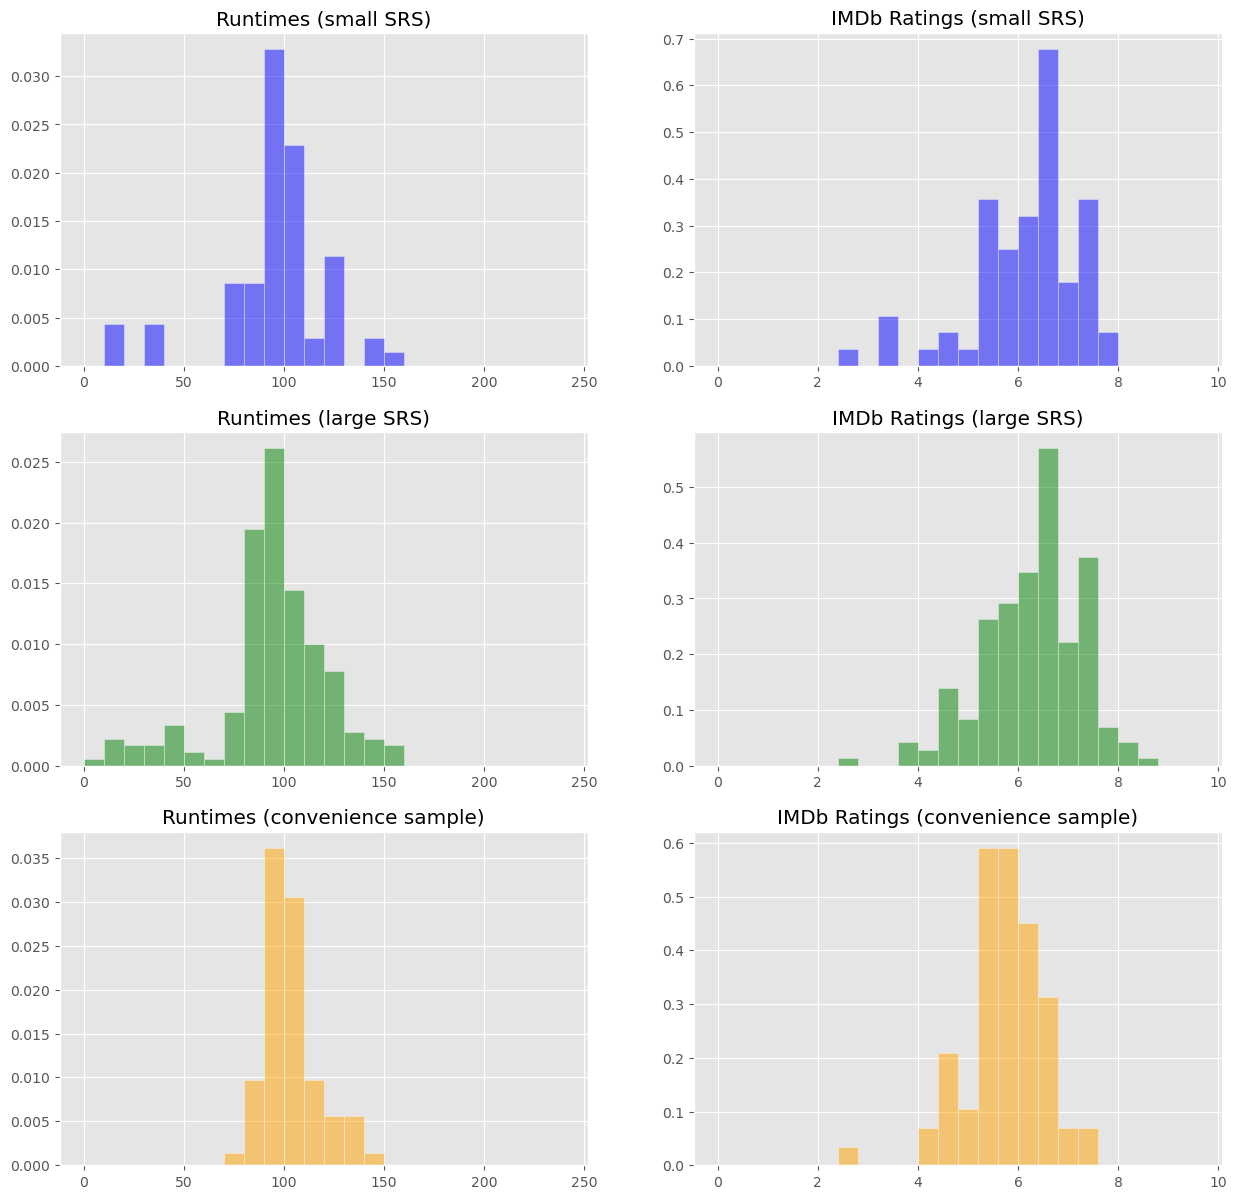

In [23]:
# Don't change this cell, but do run it.
small_srs_data = bpd.read_csv('data/small_srs_rating.csv').set_index('Title')
large_srs_data = bpd.read_csv('data/large_srs_rating.csv').set_index('Title')

small_stats = compute_statistics(small_srs_data, draw=False);
large_stats = compute_statistics(large_srs_data, draw=False);
convenience_stats = compute_statistics(convenience_sample, draw=False);

print('Full data stats:                 ', movie_stats)
print('Small SRS stats:                 ', small_stats)
print('Large SRS stats:                 ', large_stats)
print('Convenience sample stats:        ', convenience_stats)

color_dict = {
    'small SRS': 'blue',
    'large SRS': 'green',
    'convenience sample': 'orange'
}

plt.subplots(3, 2, figsize=(15, 15), dpi=100)
i = 1

for df, name in zip([small_srs_data, large_srs_data, convenience_sample], color_dict.keys()):
    plt.subplot(3, 2, i)
    i += 2
    plt.hist(df.get('Runtime'), density=True, alpha=0.5, color=color_dict[name], ec='w', 
             bins=np.arange(0, 250, 10))
    plt.title(f'Runtimes ({name})');

i = 2
for df, name in zip([small_srs_data, large_srs_data, convenience_sample], color_dict.keys()):
    plt.subplot(3, 2, i)
    i += 2
    plt.hist(df.get('IMDb Score'), density=True, alpha=0.5, color=color_dict[name], ec='w', 
             bins=np.arange(0, 10, 0.4))
    plt.title(f'IMDb Ratings ({name})');

### Producing simple random samples
Often it's useful to take random samples even when we have a larger dataset available.  One reason is that doing so can help us understand how inaccurate other samples are.

As we saw in [Lecture 13](https://dsc10.com/resources/lectures/lec13/lec13.html#Sampling-rows-from-a-DataFrame), DataFrames have a `.sample` method for producing simple random samples.  Note that its default is to sample **without** replacement, which aligns with how simple random samples are drawn.

**Question 2.4.** Produce a simple random sample of size 70 from `movie_data`. Store an array containing the mean `'Runtime'` and mean `'IMDb Score'` of your SRS in `my_small_stats`. Again, it's fine if histograms are displayed.

array([89.22857143,  6.13571429])

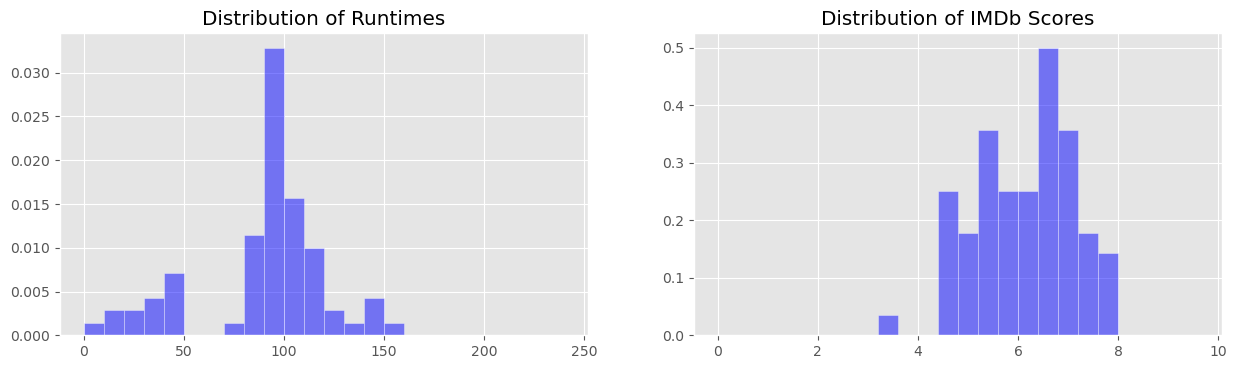

In [24]:
my_small_stats = compute_statistics(movie_data.sample(70, replace = True))
my_small_stats

Run the cell above many times, to collect new samples and compute their sample means.

<br>

Now, recall, `small_stats` is an array containing the mean `'Runtime'` and mean `'IMDb Score'` for the one small SRS that we provided you with:

In [25]:
small_stats

array([94.74285714,  6.16571429])

Answer the following two-fold question:
- Are the values in `my_small_stats` (the mean `'Runtime'` and `'IMDb Score'` for **your** small SRS) similar to the values in `small_stats` (the mean `'Runtime'` and `'IMDb Score'` for the small SRS **we provided you with**)? 
- Each time you collect a new sample – i.e. each time you re-run the cell where `my_small_stats` is defined – do the values in `my_small_stats` change a lot?

Assign either 1, 2, 3, or 4 to the variable `sampling_q4` below.
1. The values in `my_small_stats` are identical to the values in `small_stats`, and change a bit each time a new sample is collected.
1. The values in `my_small_stats` are identical to the values in `small_stats`, and don't change at all each time a new sample is collected.
1. The values in `my_small_stats` are slightly different from the values in `small_stats`, and change a bit each time a new sample is collected.
1. The values in `my_small_stats` are very different from the values in `small_stats`, and don't change at all each time a new sample is collected.

In [26]:
sampling_q4 = 3

In [27]:
grader.check("q2_4")

q2_4 results: All test cases passed!

**Question 2.5.** Similarly, create a simple random sample of size 180 from `movie_data` and store an array of the sample's mean `'Runtime'` and mean `'IMDb Score'` in `my_large_stats`.

array([94.56666667,  6.39055556])

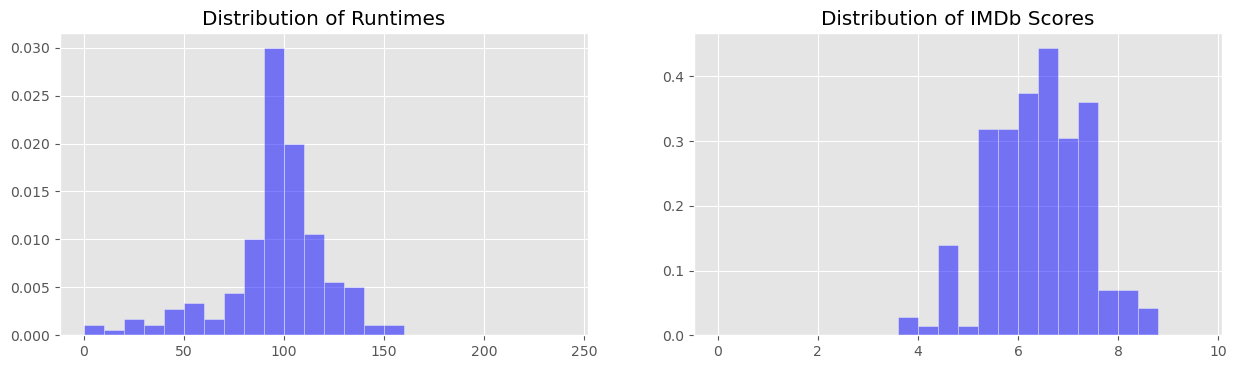

In [28]:
my_large_stats = compute_statistics(movie_data.sample(180, replace = True))
my_large_stats

Run the cell in which `my_large_stats` is defined many times. Do the histograms and  mean statistics (mean `'Runtime'` and mean `'IMDb Score'`) seem to change more or less across samples of size 180 than across samples of size 70?

Assign either 1, 2, or 3 to the variable `sampling_q5` below. 

1. The statistics change *less* across samples of size 180 than across samples of size 70.
1. The statistics change an *equal amount* across samples of size 180 and across samples of size 70.
1. The statistics change *more* across samples of size 180 than across samples of size 70.

In [29]:
sampling_q5 = 1

In [30]:
grader.check("q2_5")

q2_5 results: All test cases passed!

## 3. Milk Tea, Yippee! 🥛🍵

You are planning to open a milk tea shop in La Jolla! To get a sense of the local residents' milk tea preferences, you survey 200 randomly selected La Jolla residents and ask which type of tea they prefer the most among six options – `'jasmine'`, `'oolong'`, `'black'`, `'golden'`, `'matcha'`, `'Thai'`. 

<center><img src="images/tea.png" width=70%></center>

Run the next cell to load in the results of the survey.

In [31]:
survey = bpd.read_csv('data/tea.csv')
survey

,tea
0,jasmine
1,golden
2,black
3,matcha
4,matcha
...,...
195,black
196,matcha
197,oolong
198,black


What you're truly interested in, though, is the proportion of *all La Jolla residents* that prefer each type of tea. These are *population parameters* (plural, because there are six proportions).

Your friends tell you that jasmine tea is popular and that your shop should focus on jasmine tea-based creations. To make an informed decision, you decide to look at your survey data to determine the proportion of La Jolla residents that prefer `'jasmine'` tea over all other types of teas.

**Question 3.1.** Start by calculating the proportion of residents in your sample who prefer `'jasmine'` tea. Assign this value to `jasmine_proportion`.



In [32]:
jasmine_proportion = survey[survey.get('tea') == 'jasmine'].shape[0] / survey.shape[0]
jasmine_proportion

0.245

In [33]:
grader.check("q3_1")

q3_1 results: All test cases passed!

You're done... or are you? You have a single estimate for the true proportion of residents who prefer `'jasmine'` tea. However, you don't know how close that estimate is, or how much it could have varied if you'd had a different sample. In other words, you have an estimate, but no understanding of how close that estimate is to the true proportion of all local residents who prefer `'jasmine'` tea.

This is where the idea of resampling via **[bootstrapping](https://inferentialthinking.com/chapters/13/2/Bootstrap.html)** comes in. Assuming that our sample resembles the population fairly well, we can resample from our original sample to produce more samples. From each of these resamples, we can produce another estimate for the true proportion of residents who prefer `'jasmine'` tea, which gives us a distribution of sample proportions that describes how the estimate might vary given different samples. We can then use this distribution to understand the **variability** in the estimated proportion of residents who prefer `'jasmine'` tea.


**Question 3.2.** Now, let's use bootstrapping to get a sense of the distribution of the sample proportion. Complete the following code to produce 1,000 bootstrapped estimates for the proportion of residents who prefer `'jasmine'` tea. Store your 1,000 estimates in an array named `boot_jasmine_proportions`.

In [34]:
boot_jasmine_proportions = np.array([])
for i in np.arange(1000):
    resample = survey.sample(200, replace = True)
    resample_proportion = resample[resample.get('tea') == 'jasmine'].shape[0] / 200
    boot_jasmine_proportions = np.append(boot_jasmine_proportions, resample_proportion)

boot_jasmine_proportions

array([0.215, 0.22 , 0.265, 0.19 , 0.275, 0.245, 0.245, 0.23 , 0.235,
       0.295, 0.245, 0.245, 0.25 , 0.2  , 0.225, 0.24 , 0.3  , 0.235,
       0.235, 0.18 , 0.245, 0.225, 0.285, 0.25 , 0.3  , 0.235, 0.19 ,
       0.245, 0.28 , 0.26 , 0.33 , 0.235, 0.235, 0.195, 0.18 , 0.21 ,
       0.245, 0.235, 0.2  , 0.195, 0.305, 0.24 , 0.255, 0.17 , 0.215,
       0.325, 0.265, 0.26 , 0.23 , 0.225, 0.22 , 0.22 , 0.265, 0.245,
       0.3  , 0.26 , 0.29 , 0.215, 0.265, 0.26 , 0.285, 0.21 , 0.235,
       0.27 , 0.26 , 0.255, 0.19 , 0.25 , 0.29 , 0.25 , 0.285, 0.24 ,
       0.285, 0.21 , 0.3  , 0.27 , 0.295, 0.225, 0.215, 0.24 , 0.23 ,
       0.23 , 0.285, 0.25 , 0.28 , 0.31 , 0.27 , 0.32 , 0.275, 0.225,
       0.255, 0.24 , 0.26 , 0.205, 0.255, 0.205, 0.19 , 0.255, 0.23 ,
       0.26 , 0.28 , 0.28 , 0.2  , 0.24 , 0.22 , 0.285, 0.305, 0.235,
       0.205, 0.21 , 0.215, 0.27 , 0.3  , 0.2  , 0.27 , 0.245, 0.25 ,
       0.24 , 0.25 , 0.22 , 0.29 , 0.225, 0.25 , 0.22 , 0.235, 0.235,
       0.23 , 0.265,

In [35]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.3.** Using the array `boot_jasmine_proportions`, compute an approximate **95%** confidence interval for the true proportion of residents who prefer `'jasmine'` tea.  Compute the lower and upper ends of the interval, named `jasmine_lower_bound` and `jasmine_upper_bound`, respectively.

In [36]:
jasmine_lower_bound = np.percentile(boot_jasmine_proportions, 2.5)
jasmine_upper_bound = np.percentile(boot_jasmine_proportions, 97.5)

# Print the confidence interval:
print("Bootstrapped 95% confidence interval for the true proportion of residents who prefer jasmine tea in the population:\n[{:f}, {:f}]".format(jasmine_lower_bound, jasmine_upper_bound))

Bootstrapped 95% confidence interval for the true proportion of residents who prefer jasmine tea in the population:
[0.185000, 0.300125]


In [37]:
grader.check("q3_3")

q3_3 results: All test cases passed!

**Question 3.4.**
Is it true that 95% of the population lies in the range `jasmine_lower_bound` to `jasmine_upper_bound`? Assign the variable `q3_4` to either `True` or `False`. 

In [38]:
q3_4 = False

In [39]:
grader.check("q3_4")

q3_4 results: All test cases passed!

**Question 3.5.**
Is it true that the proportion of La Jolla residents who prefer `'jasmine'` tea over the other teas is a random quantity with approximately a 95% chance of falling between `jasmine_lower_bound` and `jasmine_upper_bound`? Assign the variable `q3_5` to either `True` or `False`.

In [40]:
q3_5 = False

In [41]:
grader.check("q3_5")

q3_5 results: All test cases passed!

**Question 3.6.**
Suppose we were somehow able to produce 2,000 new samples, each one a uniform random sample of 200 La Jolla residents taken directly from the population. For each of those 2,000 new samples, we create a 95% confidence interval for the proportion of residents who prefer `'jasmine'` tea. Roughly how many of those 2,000 intervals should we expect to actually contain the true proportion of the population? Assign your answer to the variable `how_many` below. It should be of type `int`, representing the *number* of intervals, not the proportion or percentage.

In [42]:
how_many = int(0.95 * 2000)
how_many

1900

In [43]:
grader.check("q3_6")

q3_6 results: All test cases passed!

**Question 3.7.** We also created 90%, 96%, and 99% confidence intervals from one sample (shown below), but forgot to label which confidence intervals were which! Match the interval to the percent of confidence the interval represents and assign your choices (either 1, 2, or 3) to variables `ci_90`, `ci_96`, and `ci_99`, corresponding to the 90%, 96%, and 99% confidence intervals respectively.

*Hint*: Drawing the confidence intervals out on paper might help you visualize them better.


1. $[0.185, 0.31]$

2. $[0.195, 0.3]$

3. $[0.175,  0.325]$




In [44]:
ci_90 = 2 
ci_96 = 1  
ci_99 = 3 
ci_90, ci_96, ci_99

(2, 1, 3)

In [45]:
grader.check("q3_7")

q3_7 results: All test cases passed!

**Question 3.8.** Based on the results in `survey`, it seems that `'jasmine'` tea is more popular than `'black'` tea among residents. We would like to construct a range of likely values – that is, a confidence interval – for the difference in popularity, which we define as:

$$\text{(Proportion of residents who prefer jasmine tea)} - \text{(Proportion of residents who prefer black tea)}$$

Create a function, `differences_in_resamples`, that creates **1000 bootstrapped resamples of the original survey data** in the `survey` DataFrame, computes the difference in proportions for each resample, and returns an array of these differences. Store your bootstrapped estimates in an array called `boot_differences` and plot a histogram of these estimates.

***Hints:*** 
- Use your code from Question 3.2 as a starting point.
- To plot your histogram, you'll first need to create a DataFrame with one column, whose entries are the values in `boot_differences`. 

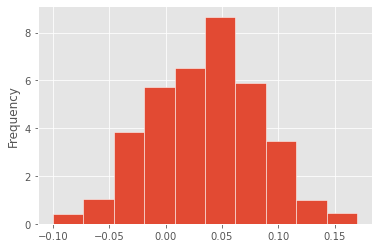

In [46]:
def differences_in_resamples():
    
    boot_differences = np.array([])
    
    for i in np.arange(1000):
        
        resamples = survey.sample(200, replace = True)
        prop_jas = resamples[resamples.get('tea') == 'jasmine'].shape[0] / 200
        prop_black = resamples[resamples.get('tea') == 'black'].shape[0] / 200
        diff = prop_jas - prop_black
        boot_differences = np.append(boot_differences, diff)
    
        
    return boot_differences

boot_differences = differences_in_resamples()

# Plot a histogram of boot_differences.
df = bpd.DataFrame()
df = df.assign(differences = differences_in_resamples())
df.plot(kind='hist', density = True, ec = 'w', legend = False);

In [47]:
grader.check("q3_8")

q3_8 results: All test cases passed!

**Question 3.9.** Compute an approximate 95% confidence interval for the difference in proportions. Assign the lower and upper bounds of the interval to `diff_lower_bound` and `diff_upper_bound`, respectively.

In [48]:
diff_lower_bound = np.percentile(boot_differences, 2.5)
diff_upper_bound = np.percentile(boot_differences, 97.5)

# Print the confidence interval:
print("Bootstrapped 95% confidence interval for the difference in popularity between jasmine tea and black tea:\n[{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 95% confidence interval for the difference in popularity between jasmine tea and black tea:
[-0.060000, 0.130000]


In [49]:
grader.check("q3_9")

q3_9 results: All test cases passed!

**Question 3.10.** In this question, you computed two 95% confidence intervals:
- In Question 3.3, you found a 95% confidence interval for the proportion of residents who prefer `'jasmine'` tea among the six tea options. Let's call this the "jasmine CI."
- In Question 3.9, you found a 95% confidence interval for the difference between the proportion of residents who prefer `'jasmine'` tea and the proportion of residents who prefer `'black'` tea. Let's call this the "difference CI." 

Choose how to best fill in the blanks to describe the widths of these two confidence intervals. Set Set `q3_10` to either 1, 2, 3, or 4.

>The jasmine CI is ________________________ than the difference CI because we have a ________________________ for a single unknown parameter than the difference between two unknown parameters.

1. wider; more accurate guess
1. narrower; more accurate guess
1. wider; less accurate guess
1. narrower; less accurate guess

In [50]:
q3_10 = 2

In [51]:
grader.check("q3_10")

q3_10 results: All test cases passed!

## 4. Need a Lyft? 🚗
Sofia is planning on traveling to Boston during Spring Break. Since she won't have a car there, she's planning on using Uber or Lyft, two popular ride-sharing apps. Let's compare the cost of these ride-sharing apps to help Sofia save some money!

Our [dataset](https://www.kaggle.com/datasets/ravi72munde/uber-lyft-cab-prices/data) contains a **sample** of all Uber and Lyft rides in Boston. We have information on the `'app'` (Lyft or Uber), the `'mode'` (level of service), the `'destination'` and `'source'` neighborhoods, the `'price'` in dollars, and the `'distance'` in miles. Run the cell below to load this data into the DataFrame `rideshare`.

In [52]:
rideshare = bpd.read_csv('data/rideshare.csv')
rideshare

,app,mode,destination,source,price,distance
0,Uber,Black SUV,Beacon Hill,Northeastern University,31.5,2.61
1,Uber,Black,North Station,Haymarket Square,15.0,0.49
2,Uber,Black,Northeastern University,Back Bay,16.0,1.22
3,Lyft,Lux Black XL,Boston University,Beacon Hill,32.5,2.26
4,Uber,UberXL,Theatre District,Northeastern University,14.0,1.91
...,...,...,...,...,...,...
70509,Uber,Black,Financial District,Boston University,33.0,4.72
70510,Lyft,Shared,South Station,Theatre District,3.5,0.59
70511,Lyft,Lux Black,Northeastern University,West End,30.0,3.11
70512,Uber,Black,North End,Financial District,16.0,1.21


**Question 4.1.** Let's start by determining the mean price for each of the two ridesharing apps. Create a DataFrame called `uber_lyft_means`, indexed by `'app'`, with one column called `'price'` that contains the mean price for each ridesharing app. Sort `uber_lyft_means` in ascending order of `'price'`.

***Hint:*** This takes just one line of code.

In [53]:
uber_lyft_means = rideshare.get(['app','price']).groupby('app').mean().sort_values(by='price')
uber_lyft_means

,price
app,
Uber,15.817583
Lyft,17.415107


In [54]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 4.2.** Based on the data we have, one rideshare app appears to be cheaper than the other. But the data we have access to is only a sample of all rides, and thus the mean prices we computed above are only sample statistics, not  population parameters. Let's now extend each of our estimates to create a confidence interval for the mean price of **all** rides on each app. We'll start with Uber.

Produce 1,000 bootstrapped estimates for the mean price of **all** Uber rides. Store the estimates in the `uber_means` array. Then, use the `uber_means` array to calculate an approximate **99% confidence interval** for the true mean price of all Uber rides. Assign the endpoints of your interval to `lower_bound` and `upper_bound`.

***Hint:*** Make sure to query **before** resampling!

'A 99% confidence interval for the average Uber ride price is [15.7011964969896, 15.933115695128627].'

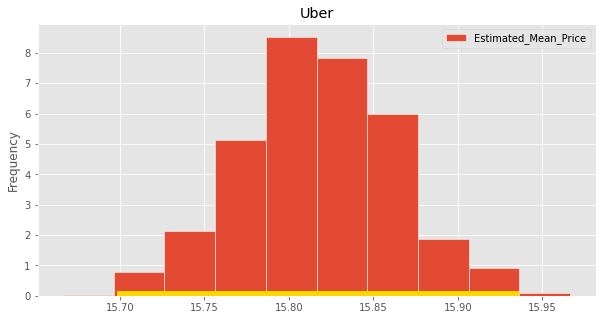

In [55]:
uber_means = np.array([])
uber_only = rideshare[rideshare.get('app') == 'Uber']

for i in np.arange(1000):
    sample = uber_only.sample(uber_only.shape[0], replace = True)
    sample_mean = sample.get('price').mean()
    uber_means = np.append(uber_means, sample_mean)


lower_bound = np.percentile(uber_means, 0.5)
upper_bound = np.percentile(uber_means, 99.5)

# Display the estimates in a histogram.
bpd.DataFrame().assign(Estimated_Mean_Price=uber_means).plot(kind='hist', density=True, ec='w', figsize=(10, 5), title='Uber');
plt.plot([lower_bound, upper_bound], [0, 0], color='gold', linewidth=10, label='99% confidence interval');

# Don't change what's below (though you will need to copy and change it in 4.3).
app_name = 'Uber'
f'A 99% confidence interval for the average {app_name} ride price is [{lower_bound}, {upper_bound}].'

In [56]:
grader.check("q4_2")

q4_2 results: All test cases passed!

**Question 4.3.** Now we want to calculate the corresponding confidence interval for Lyft. Instead of copying our code from Question 4.2 and changing it to work for Lyft, let's write a more general function that works for _both_ Uber and Lyft. 

Create a function called `app_and_hist`, which takes in the name of a ridesharing app as a string, and:
1. **Plots the histogram** of 1,000 bootstrapped estimates for that app's mean price.
2. **Returns** a string describing the approximate 99% confidence interval for that app's mean price, formatted in the same way as the string displayed for Uber in Question 4.2. 

***Notes:*** 
- Make sure your function both plots a histogram and **returns** a string. For example, `mode_and_hist('Uber')` should return a string that starts with `'A 99% confidence interval for the average Uber ride price is'`. It's ok if you see the return string displayed before the plot.
- The string displayed at the end of Question 4.2 was created using a feature of Python called f-strings. You'll need to copy and change that f-string expression. Read [this article](https://realpython.com/python-f-strings/#simple-syntax) for more details about f-strings if you're interested.

A 99% confidence interval for the average Uber ride price is [15.70774377394636, 15.925085454296662].
A 99% confidence interval for the average Lyft ride price is [17.26931125713781, 17.558575569553188].


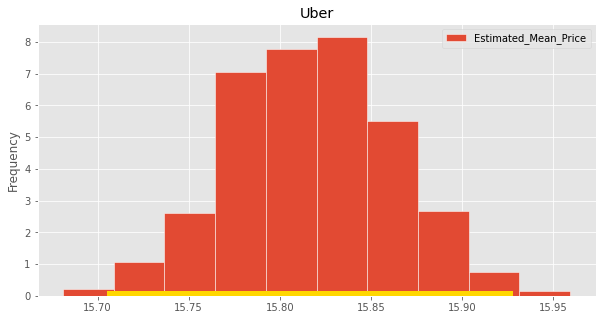

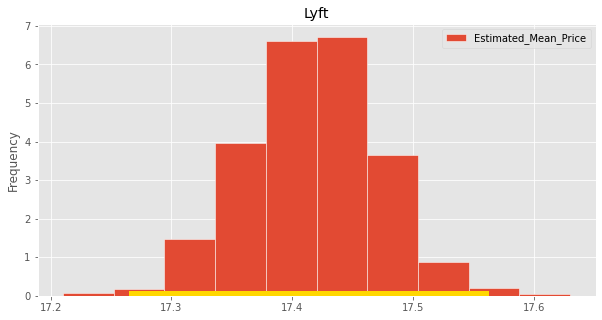

In [57]:
def app_and_hist(app_name):
    
    app_means = np.array([])
    app_only = rideshare[rideshare.get('app') == app_name]

    for i in np.arange(1000):
        sample = app_only.sample(app_only.shape[0], replace = True)
        sample_mean = sample.get('price').mean()
        app_means = np.append(app_means, sample_mean)

    lower_bound = np.percentile(app_means, 0.5)
    upper_bound = np.percentile(app_means, 99.5)
    
    bpd.DataFrame().assign(Estimated_Mean_Price=app_means).plot(kind='hist', density=True, ec='w', figsize=(10, 5), title=app_name);
    plt.plot([lower_bound, upper_bound], [0, 0], color='gold', linewidth=10, label='99% confidence interval');
    
    return f'A 99% confidence interval for the average {app_name} ride price is [{lower_bound}, {upper_bound}].'



# Example calls to the function. Don't change the lines below.
uber_string = app_and_hist('Uber')
print(uber_string)
lyft_string = app_and_hist('Lyft')
print(lyft_string)

In [58]:
grader.check("q4_3")

q4_3 results: All test cases passed!

## Finish Line: Almost there, but make sure to follow the steps below to submit! 🏁

**_Citations:_** Did you use any generative artificial intelligence tools to assist you on this assignment? If so, please state, for each tool you used, the name of the tool (ex. ChatGPT) and the problem(s) in this assignment where you used the tool for help.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

Please cite tools here.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.
5. Stick around while the Gradescope autograder grades your work. Make sure you see that all tests have passed on Gradescope.
6. Check that you have a confirmation email from Gradescope and save it as proof of your submission. 

In [59]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q1_5 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q3_1 results: All test cases passed!

q3_10 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_4 results: All test cases passed!

q3_5 results: All test cases passed!

q3_6 results: All test cases passed!

q3_7 results: All test cases passed!

q3_8 results: All test cases passed!

q3_9 results: All test cases passed!

q4_1 results: All test cases passed!

q4_2 results: All test cases passed!

q4_3 results: All test cases passed!